**Aman Dubal**

# Import required libraries

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Loading dataset
download the dataset from : https://github.com/kennedykwangari/Mall-Customer-Segmentation-Data/blob/master/Mall_Customers.csv

In [12]:
df = pd.read_csv('/content/Mall_Customers.csv')
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Data Preprocessing

Clecking null values

In [3]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Checking Row and total values in dataset

In [4]:
df.shape

(200, 5)

Column names

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Extract relevant features


In [21]:
X = df[[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the data (important for K-means)

In [22]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Clustering K means

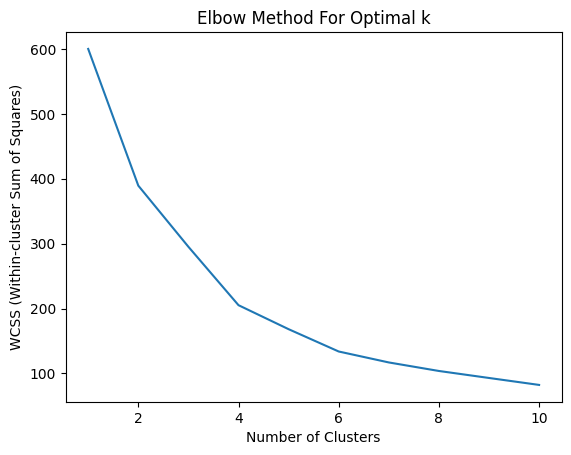

In [23]:
# Choose the number of clusters (k) using the Elbow method
wcss = []  # Within-cluster sum of squares

# Loop over different values of k to compute WCSS
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph to identify the optimal k
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.show()


Fit the K-means model with the optimal k (k=3 from the Elbow method)

In [27]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_scaled)



KMeans(n_clusters=3, n_init=10, random_state=42)

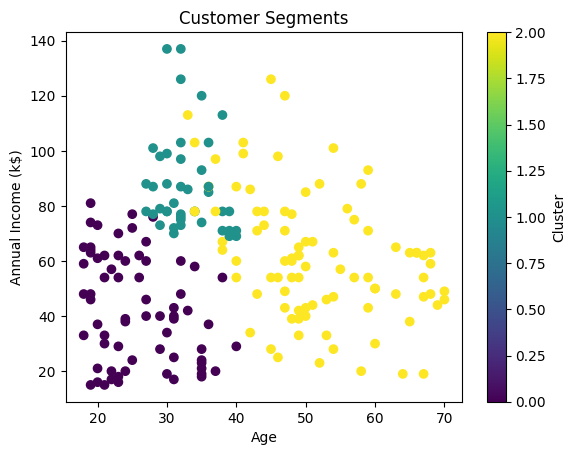


Cluster Centers (in original scale):
Cluster centers (in original scale):
         Age  Annual Income (k$)  Spending Score (1-100)
0  25.838235           42.750000               53.647059
1  32.853659           87.341463               79.975610
2  51.274725           61.802198               34.208791


In [34]:
# Add the cluster labels to the original data
df['Cluster'] = kmeans.labels_
features = [ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
#  Visualize the clusters (2D scatter plot for illustration)
#  we can plot Age vs. Annual Income with the cluster colors
plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.colorbar(label='Cluster')
plt.show()

# Step 11: Analyze the cluster centers (in the original scale)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Bring the data back to original scale
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
print("\nCluster Centers (in original scale):")

print("Cluster centers (in original scale):")
print(cluster_centers_df)